# Training a Sarcasm Detection Model 


In [1]:
# Download the dataset
!gdown --id 1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v

/opt/anaconda3/lib/python3.8/site-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v
To: /Users/alirezanabaviadmin/Dropbox (ASU)/Data science/My Github/Deep_Learning/Natural Language Processing/sarcasm.json
100%|██████████████████████████████████████| 5.64M/5.64M [00:01<00:00, 3.36MB/s]


In [3]:
import json

# Load the JSON file
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [10]:
datastore[0].keys()

dict_keys(['article_link', 'headline', 'is_sarcastic'])

In [6]:
for i in range(10):
    print(f'the label of "{sentences[i]}" is {labels[i]}')

the label of "former versace store clerk sues over secret 'black code' for minority shoppers" is 0
the label of "the 'roseanne' revival catches up to our thorny political mood, for better and worse" is 0
the label of "mom starting to fear son's web series closest thing she will have to grandchild" is 1
the label of "boehner just wants wife to listen, not come up with alternative debt-reduction ideas" is 1
the label of "j.k. rowling wishes snape happy birthday in the most magical way" is 0
the label of "advancing the world's women" is 0
the label of "the fascinating case for eating lab-grown meat" is 0
the label of "this ceo will send your kids to school, if you work for his company" is 0
the label of "top snake handler leaves sinking huckabee campaign" is 1
the label of "friday's morning email: inside trump's presser for the ages" is 0


In [11]:
print(f'the length of the dataset is {len(datastore)}')

the length of the dataset is 26709


## Split the Dataset

In [12]:
training_size = 20000

# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

## Data preprocessing

In [13]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

## Build and Compile the Model

In [14]:
import tensorflow as tf

# Parameters
embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

# Model Definition with Conv1D
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_conv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 conv1d (Conv1D)             (None, 116, 128)          10368     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
__________________________________________________

## Train the Model

In [15]:
NUM_EPOCHS = 10

# Train the model
history_conv = model_conv.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10
625/625 [==============================] - 4s 6ms/step - loss: 0.4560 - accuracy: 0.7700 - val_loss: 0.3537 - val_accuracy: 0.8453
Epoch 2/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2303 - accuracy: 0.9078 - val_loss: 0.3579 - val_accuracy: 0.8501
Epoch 3/10
625/625 [==============================] - 4s 7ms/step - loss: 0.1149 - accuracy: 0.9598 - val_loss: 0.4675 - val_accuracy: 0.8390
Epoch 4/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0495 - accuracy: 0.9863 - val_loss: 0.5552 - val_accuracy: 0.8422
Epoch 5/10
625/625 [==============================] - 5s 9ms/step - loss: 0.0203 - accuracy: 0.9951 - val_loss: 0.6897 - val_accuracy: 0.8375
Epoch 6/10
625/625 [==============================] - 6s 9ms/step - loss: 0.0088 - accuracy: 0.9981 - val_loss: 0.7858 - val_accuracy: 0.8308
Epoch 7/10
625/625 [==============================] - 6s 10ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.8831 - val_accuracy: 0.8314
Epoch

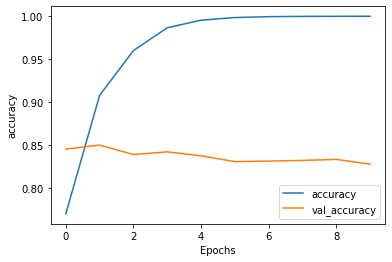

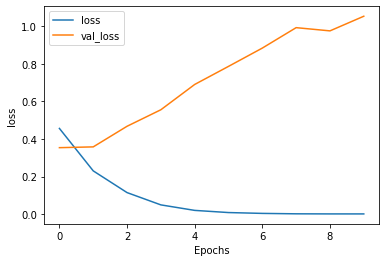

In [16]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')

# LSTM model

In [17]:
# Parameters
embedding_dim = 16
lstm_dim = 32
dense_dim = 24

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 24)                1560      
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 174,129
Trainable params: 174,129
Non-trainable params: 0
_________________________________________________________________


In [18]:
NUM_EPOCHS = 10

# Train the model
history_lstm = model_lstm.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10
625/625 [==============================] - 20s 28ms/step - loss: 0.4199 - accuracy: 0.7888 - val_loss: 0.3336 - val_accuracy: 0.8515
Epoch 2/10
625/625 [==============================] - 18s 29ms/step - loss: 0.2173 - accuracy: 0.9115 - val_loss: 0.3339 - val_accuracy: 0.8602
Epoch 3/10
625/625 [==============================] - 20s 32ms/step - loss: 0.1318 - accuracy: 0.9506 - val_loss: 0.4393 - val_accuracy: 0.8495
Epoch 4/10
625/625 [==============================] - 22s 35ms/step - loss: 0.0775 - accuracy: 0.9733 - val_loss: 0.4911 - val_accuracy: 0.8459
Epoch 5/10
625/625 [==============================] - 21s 33ms/step - loss: 0.0462 - accuracy: 0.9851 - val_loss: 0.6053 - val_accuracy: 0.8405
Epoch 6/10
625/625 [==============================] - 19s 30ms/step - loss: 0.0266 - accuracy: 0.9923 - val_loss: 0.7023 - val_accuracy: 0.8408
Epoch 7/10
625/625 [==============================] - 18s 30ms/step - loss: 0.0223 - accuracy: 0.9930 - val_loss: 0.8401 - val_accuracy:

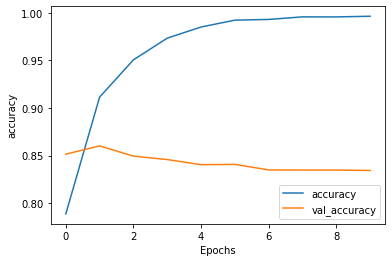

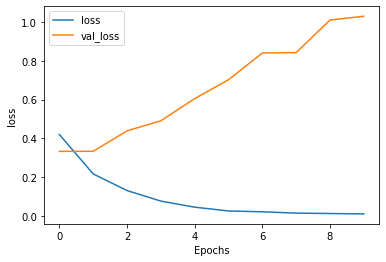

In [19]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')